# From Raw Data to Insights: Film Industry Analysis  

## Introduction 🎥🍿   
This project focuses on **data cleaning, exploration, and visualization** to uncover insights about the movie industry. 

### **Dataset Information:**  
Our original dataset contains information on various movies, including:  
- **Title**
- **Rating**
- **Genre**
- **Year**  
- **Full Date of Release**  
- **Score**  
- **Votes**
- **Director**
- **Writer**
- **Star**
- **Country**
- **Budget**
- **Gross**
- **Company**
- **Runtime**

This dataset will be cleaned, analyzed, and visualized to uncover trends and insights in the movie industry 🎬🎭🌟

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
df = pd.read_csv(r"C:\Users\97253\Downloads\movies.csv\movies.csv")

## Let's start with data cleaning

In [22]:
# Check for relavent missing data by calculating the percentages

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}: {}%'.format(col, pct_missing))

name: 0.0%
rating: 0.010041731872717789%
genre: 0.0%
year: 0.0%
released: 0.0002608242044861763%
score: 0.0003912363067292645%
votes: 0.0003912363067292645%
director: 0.0%
writer: 0.0003912363067292645%
star: 0.00013041210224308815%
country: 0.0003912363067292645%
budget: 0.2831246739697444%
gross: 0.02464788732394366%
company: 0.002217005738132499%
runtime: 0.0005216484089723526%


In [30]:
# We would like to drop rows where the 'budget' and 'gross' has missing values.
# We'll use them for correlation in the future.
# Create a copy of the original dataframe before making any modifications
df_clean = df.copy()

df_clean = df_clean.dropna(subset=['gross', 'budget'])

In [35]:
# We also want to convert 'budget' and 'gross' columns to integers (rounding the values).
df_clean['budget'] = df_clean['budget'].astype('int64')
df_clean['gross'] = df_clean['gross'].astype('int64')

## Some movies have different year specified in "Year" compared to the release column

Let's create a new column and save the year, extracted from 'released' column (If does not match the 'Year'),
Compare columns "Year" and "extracted_year", and paste the correct date in case of a mismatch.

Drop the created column when done.

In [40]:
import re
# Function to extract year from 'released' column
def extract_year_from_released(released):
    released_str = str(released)  # Ensure the 'released' column is treated as a string
    match = re.search(r'(\d{4})', released_str)  # Search for a 4-digit year
    if match:
        return int(match.group(1))  # Return the year as an integer
    return None  

# Apply the function to extract year and update 'year' column
df_clean['extracted_year'] = df_clean['released'].apply(extract_year_from_released)

# Now, let's explicitly update 'year' only if it doesn't match the extracted year
df_clean.loc[df_clean['year'] != df_clean['extracted_year'], 'year'] = df_clean['extracted_year']

# Now drop the temporary 'extracted_year' column
df_clean.drop(columns=['extracted_year'], inplace=True)

# Let's for example check if the movie "Heaven's Gate" has the correct year now
heavens_gate = df_clean[df_clean['name'].str.contains("Heaven's Gate", case=False, na=False)]
heavens_gate[['name', 'year', 'released']]


,name,year,released
21,Heaven's Gate,1981,"April 24, 1981 (United States)"


## Order the data by gross revenue
Apparently 2009 "Avatar" is the highest-grossing film of all time.

Surprised to see the relatively older "Titanic" holds it's place in number 3 on the list.

In [41]:
df_clean.sort_values(by='gross', ascending=False, inplace=True)
df_clean.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0


## Drop any duplicated rows

In [50]:
# Let's check for duplicated rows:
df_clean.duplicated()  # (Returns the full boolean series of True/False)

5445    False
7445    False
3045    False
6663    False
7244    False
        ...  
2434    False
3681    False
272     False
2417    False
3203    False
Length: 5436, dtype: bool

In [49]:
df.duplicated().any()  # (Returns single bool value - if there is at least one True, or All False) 

False

In [51]:
# Remove them if exist:
df_clean.drop_duplicates(inplace=True)

In [52]:
# Let's save the cleaned data frame for future analysis, and continue with finding correlations
df_clean.to_csv(r"C:\Users\97253\Downloads\movies_df.csv", index=False)

## Correlation Analysis and Visualizations

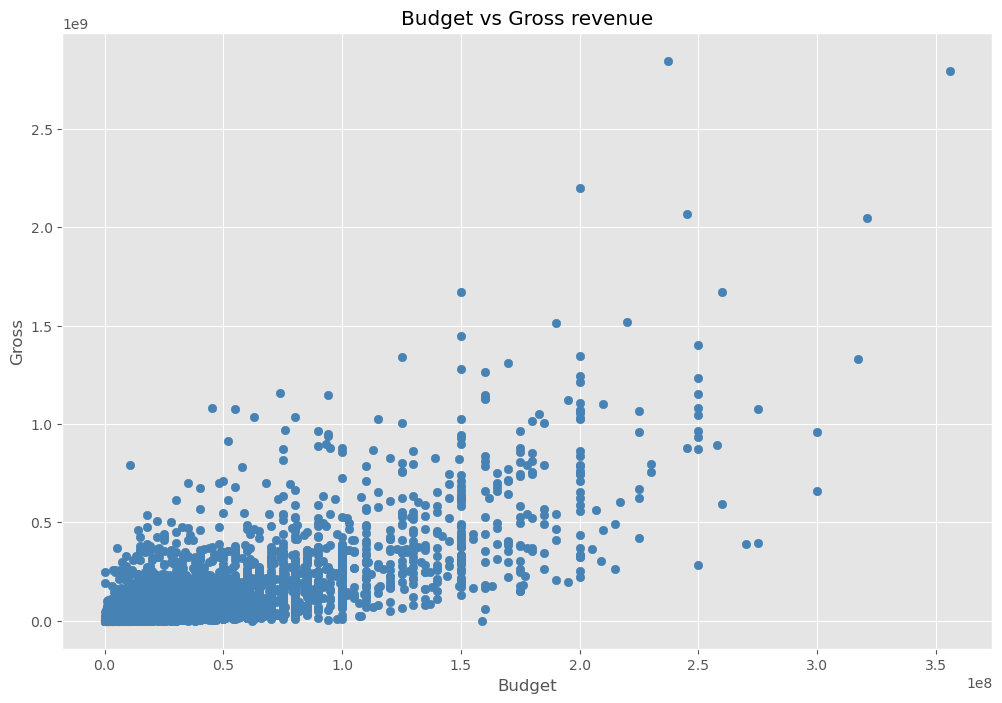

In [68]:
# Checking for correlation, scatter plot with budget vs gross

sorted_df = df_clean.sort_values(by='gross', ascending=False)
plt.scatter(x = sorted_df["budget"], y = sorted_df["gross"], color='#4682B4')
plt.title('Budget vs Gross revenue')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

Budget and Gross seem to bo correlated, but let's make it clearer with **regression** using **Seaborn**

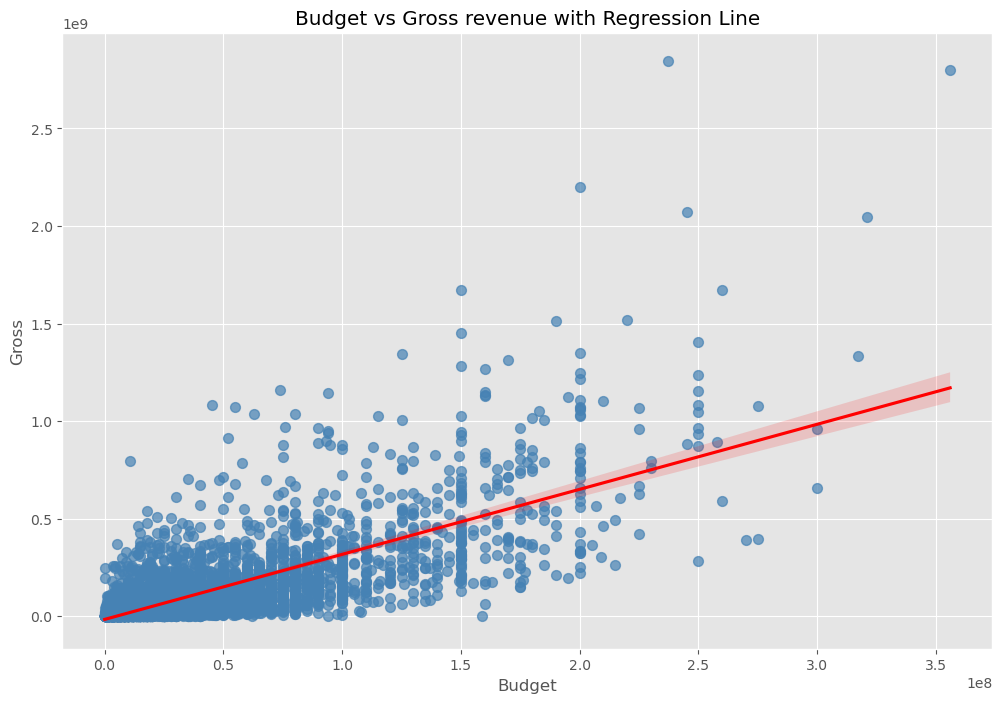

In [69]:
# Let's create a regplot with regression line to show the trend
sns.regplot(x='budget', y='gross', data=sorted_df, scatter_kws={'color': '#4682B4', 's': 50, 'alpha': 0.7}, line_kws={'color': 'red'})

plt.title('Budget vs Gross revenue with Regression Line')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

Let's now look at a correlation table and a visualization matrix

In [67]:
df_clean.select_dtypes(include=['number']).corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.061029,0.202883,0.320245,0.268626,0.074432
score,0.061029,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.202883,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.320245,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.268626,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074432,0.414580,0.352437,0.318595,0.275596,1.000000


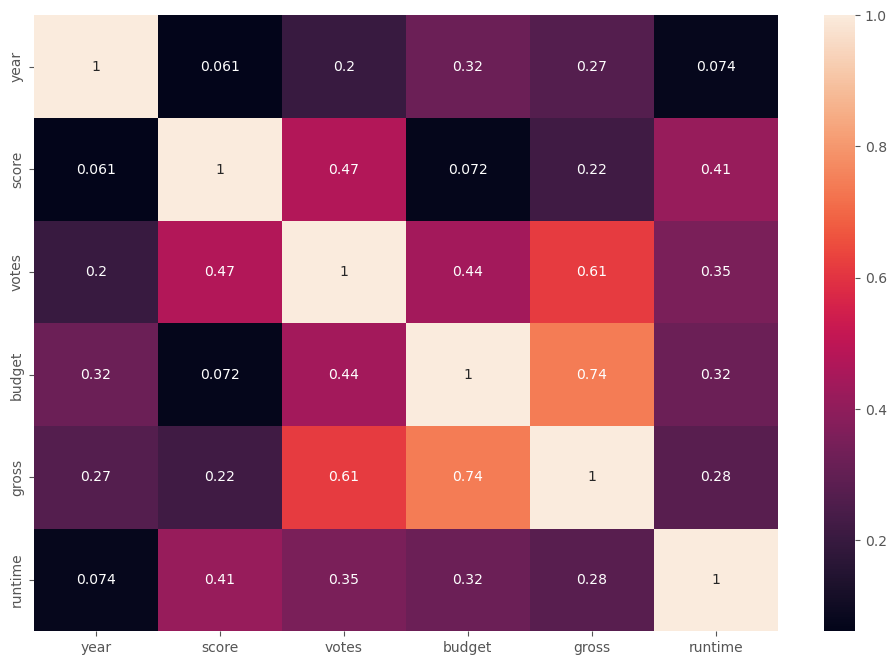

In [65]:
corr_matrix = df_clean.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Budget and Gross revenue are highly correlated indeed (0.74) #
## Gross and Votes seem to also be correlated (0.61) ##

## Let's also check correlation between 'Company' and 'Gross' ##
We'll want to convert a categorical column to numeric code, in order to perform the analysis

In [70]:
# Make a copy of the cleaned dataframe
df_numerized = df_clean.copy()

# Convert 'Company' column
if df_numerized['company'].dtype == 'object':
    df_numerized['company'] = df_numerized['company'].astype('category')
    df_numerized['company'] = df_numerized['company'].cat.codes

# Now, check the correlation between 'company' and 'gross'
correlation_company_gross = df_numerized[['company', 'gross']].corr()
correlation_company_gross


,company,gross
company,1.000000,0.150233
gross,0.150233,1.000000


The correlation between 'Company' and 'Gross' is approximately **0.15**.
In other words, there may be some pattern, but the company a movie belongs to **does not** strongly influence the gross revenue.